In [7]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_csv = "data/mouse_drug_data.csv"
clinical_trial_data_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_csv)
clinical_data = pd.read_csv(clinical_trial_data_csv)
# Combine the data into a single dataset
trial_data = pd.merge(mouse_data, clinical_data, on='Mouse ID')

# Display the data table for preview
trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
# Showing Data Types
trial_data.dtypes

Mouse ID               object
Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = trial_data.groupby(['Drug', 'Timepoint'])
tumor_vol = grouped_data['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol).reset_index()

# Preview DataFrame
tumor_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = grouped_data['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(tumor_vol_sem).reset_index()
# Preview DataFrame
tumor_vol_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_vol_df = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_tumor_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


No handles with labels found to put in legend.


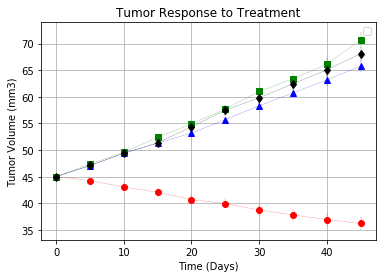

In [15]:
# Generate the Plot (with Error Bars)
drugs = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
# Creating a line for each drug in line with sample and error bar
for drug, marker, color in drugs:
    sem = tumor_vol_sem[drug]
    tumor_vol_plt = plt.errorbar(reformat_tumor_vol_df.index, reformat_tumor_vol_df[drug], sem, fmt=marker, ls='--', color=color, linewidth=.25)

plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.grid()
# Save the Figure
plt.savefig('tumor_response.png')


In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site = grouped_data['Metastatic Sites'].mean()
# Convert to DataFrame
met_site_df = pd.DataFrame(met_site).reset_index()
# Preview DataFrame
met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = grouped_data['Metastatic Sites'].sem()
# Convert to DataFrame
met_site_sem_df = pd.DataFrame(met_site_sem).reset_index()
# Preview DataFrame
met_site_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [18]:
# Minor Data Munging to Re-Format the Data Frames
reformat_met_site_df = met_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
reformat_met_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


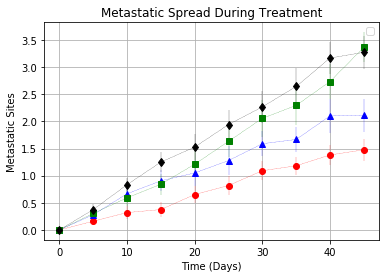

In [19]:
# Generate the Plot (with Error Bars)
for drug, marker, color in drugs:
    sem = met_site_sem[drug]
    met_site_plot = plt.errorbar(reformat_met_site_df.index, reformat_met_site_df[drug], sem, fmt=marker, ls='--', color=color, linewidth=.25)
# Plotting Labels
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc='best')
plt.grid()
# Save the Figure
plt.savefig('metastatic_response.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = grouped_data['Mouse ID'].count()
mouse_count

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df =mouse_count_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mouse_count_df = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse Count')
# Preview the Data Frame
reformat_mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


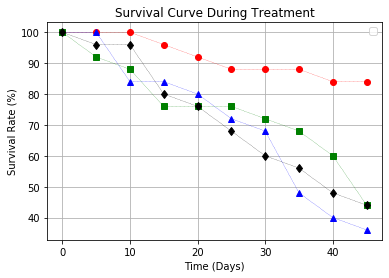

In [24]:
# Generate the Plot (Accounting for percentages)
reformat_mouse_count_df['Capomulin'].sum()
mouse_total = reformat_mouse_count_df['Capomulin'][0]
for drug, marker, color in drugs:
    mouse_total = reformat_mouse_count_df[drug][0]
    mouse_survival = (reformat_mouse_count_df[drug] / mouse_total) * 100
    survival_plot = plt.plot(reformat_mouse_count_df.index, mouse_survival, marker=marker, ls='--', color=color, linewidth=.25)
# Plotting Chart and Axes titles
plt.title('Survival Curve During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc='best')
plt.grid()
# Save the Figure
plt.savefig('survival_response.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [25]:
all_drugs = list(reformat_tumor_vol_df.columns[:])
# Calculate the percent changes for each drug
all_drugs = reformat_tumor_vol_df.columns[:]

initial_volume = []
final_volume = []
for drug in all_drugs:
    initial_volume.append(reformat_tumor_vol_df[drug][0])
    final_volume.append(reformat_tumor_vol_df[drug][45])

volume_change = (np.array(final_volume) - np.array(initial_volume)) / np.array(initial_volume) * 100
# Print Data to Confirm
print(initial_volume)
print(final_volume)
print(volume_change)

[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]
[36.23611379944762, 64.13242133515385, 65.75556227753334, 70.66295760897273, 69.26550621064615, 68.08408221741819, 66.25852868844287, 34.955594791755, 68.43831042955456, 65.96088788929286]
[-19.47530267  42.51649186  46.12347173  57.02879469  53.92334713
  51.29796048  47.24117486 -22.32090046  52.08513429  46.57975087]


In [34]:
tumor_change = {'Drug': all_drugs, '% Change': volume_change}
tumor_change_df = pd.DataFrame(tumor_change)
tumor_change_df = tumor_change_df.set_index('Drug')
tumor_change_df

,% Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


In [35]:
tumor_change_df = tumor_change_df.drop(['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], axis=0)
tumor_change_df

,% Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


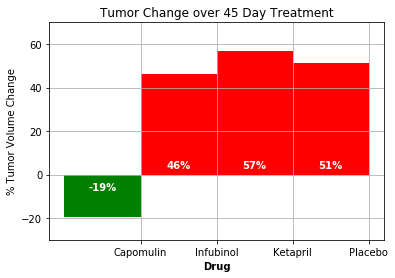

In [37]:
# tumor_change_df
# Store all Relevant Percent Changes into a Tuple
passing = tumor_change_df['% Change'] < 0
change_plot = plt.bar(tumor_change_df.index, tumor_change_df['% Change'], width=-1, align='edge', color=passing.map({True:'g',False:'r'}))
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.ylim(-30, 70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')
plt.xlabel('Drug', fontweight='bold', color = 'black', fontsize='10', horizontalalignment='center')

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom', fontweight='bold')


# Call functions to implement the function calls
autolabel(change_plot)

# Save the Figure
plt.savefig('tumor_change.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)